# Cheatcode to Exploratory Data Analysis (EDA)

It is an approach to analyzing and visualizing data sets to summarize their main characteristics, often with the help of statistical graphics and other data visualization methods. The primary goal of EDA is to uncover patterns, relationships, anomalies, and trends in the data, providing insights that can guide further analysis or decision-making processes. 

Types of Exploratory Data Analysis 

-- There are three main types of EDA: 

    - Univariate
    - Bivariate
    - Multivariate

## Step1: Understand the Data
- Familiarize yourself with the dataset, including the number of records, columns, and data types.
- Identify the target variable (if aplicable) and undersatnd its significance.ivariate

In [68]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Size


In [69]:
# load data
data = pd.read_csv('product_data.csv')
data.shape

(60, 10)

### 2. Data Preview

In [70]:
# displays the first few rows of the dataset.
data.head()

,ProductID,ProductName,Category,Price,CustomerRating,PromotionType,CustomerAge,ShippingTime,CustomerSatisfaction,ShippingDate
0,1,Smartphone X,Electronics,500,4.2,Discount,Young,2,4,02/15/2022
1,2,Fashion Jacket,Clothing,80,4.5,Bundle Offer,Adult,3,5,08/20/2021
2,3,Kitchen Blender,Home & Kitchen,120,3.8,NaN,Senior,4,3,05/10/2022
3,4,Running Shoes,Sports,60,4.0,Discount,Young,2,4,11/03/2022
4,5,LED TV,Electronics,700,4.3,NaN,Adult,3,4,06/27/2021


In [71]:
# displays the randomly selected items rows of the dataset.
data.sample(5)

,ProductID,ProductName,Category,Price,CustomerRating,PromotionType,CustomerAge,ShippingTime,CustomerSatisfaction,ShippingDate
34,205,Stylish Sunglasses,Accessories,25,4.3,NaN,Adult,3,4,06/27/2021
44,215,Bluetooth Speaker,Electronics,50,4.3,Bundle Offer,Senior,4,4,03/08/2023
4,5,LED TV,Electronics,700,4.3,NaN,Adult,3,4,06/27/2021
6,7,Home Decor Items,Home & Kitchen,25,3.5,NaN,Senior,4,2,07/08/2022
10,11,Laptop Bag,Electronics,30,4.0,NaN,Young,2,3,08/07/2022


### 3. Data Types

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             60 non-null     int64  
 1   ProductName           60 non-null     object 
 2   Category              60 non-null     object 
 3   Price                 60 non-null     int64  
 4   CustomerRating        60 non-null     float64
 5   PromotionType         25 non-null     object 
 6   CustomerAge           60 non-null     object 
 7   ShippingTime          60 non-null     int64  
 8   CustomerSatisfaction  60 non-null     int64  
 9   ShippingDate          60 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.8+ KB


In [73]:
data.dtypes

ProductID                 int64
ProductName              object
Category                 object
Price                     int64
CustomerRating          float64
PromotionType            object
CustomerAge              object
ShippingTime              int64
CustomerSatisfaction      int64
ShippingDate             object
dtype: object

### 4. Missing Values

In [74]:
# sum of null values in each columns
data.isnull().sum()

ProductID                0
ProductName              0
Category                 0
Price                    0
CustomerRating           0
PromotionType           35
CustomerAge              0
ShippingTime             0
CustomerSatisfaction     0
ShippingDate             0
dtype: int64

In [75]:
# percentage of null values in each columns
data.isnull().mean()

ProductID               0.000000
ProductName             0.000000
Category                0.000000
Price                   0.000000
CustomerRating          0.000000
PromotionType           0.583333
CustomerAge             0.000000
ShippingTime            0.000000
CustomerSatisfaction    0.000000
ShippingDate            0.000000
dtype: float64

### 5. Statistical Overview

In [76]:
# get statistical measures for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductID,60.0,115.500000,101.220936,1.0,15.75,115.5,215.25,230.0
Price,60.0,69.383333,110.925550,8.0,23.75,40.0,70.00,700.0
CustomerRating,60.0,4.106667,0.277926,3.5,3.90,4.1,4.30,4.6
ShippingTime,60.0,2.966667,0.822701,2.0,2.00,3.0,4.00,4.0
CustomerSatisfaction,60.0,3.600000,0.994902,2.0,3.00,4.0,4.00,5.0


### 6. Duplicate Data

In [77]:
# sum of duplicated rows
data.duplicated().sum()

0

In [78]:
# drop duplicated rows if any
data.drop_duplicates(inplace=True)

### 7. Correlation Analysis

In [79]:
# calculate the correlation matrix of numerical values
data.corr(numeric_only=True)

,ProductID,Price,CustomerRating,ShippingTime,CustomerSatisfaction
ProductID,1.000000,-0.288716,-0.039644,0.047830,-0.213747
Price,-0.288716,1.000000,0.235056,-0.040903,0.264957
CustomerRating,-0.039644,0.235056,1.000000,-0.065726,0.818926
ShippingTime,0.047830,-0.040903,-0.065726,1.000000,-0.223640
CustomerSatisfaction,-0.213747,0.264957,0.818926,-0.223640,1.000000


<Axes: >

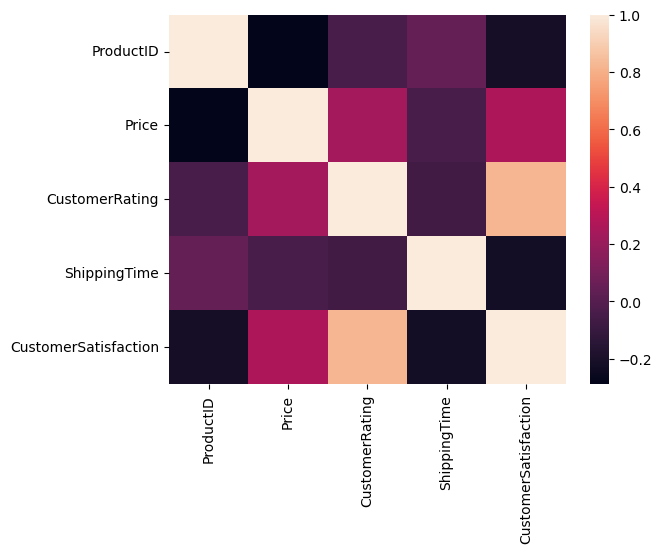

In [80]:
# showcase the correlation matrix in a heatmap 
sns.heatmap(data = data.corr(numeric_only=True))

### 8. Exploring Diversity

In [81]:
# Note: Understand the diversity and variety within a categorical column. Higher unique values may indicate a more diverse range of categories.
data['ProductName'].nunique()

60

### Step 2: Univariate Graphical Analysis

Univariate analysis refers to the examination and exploration of a single variable in a dataset.

#### Key Components:
- Generating summary statistics.
- Creating visualizations (e.g., histograms, box plots).
- Understanding the distribution and characteristics of that specific variable.

#### 1. Categorical Data
**a. Countplot**

Count occurrences of each category in a categorical variable.


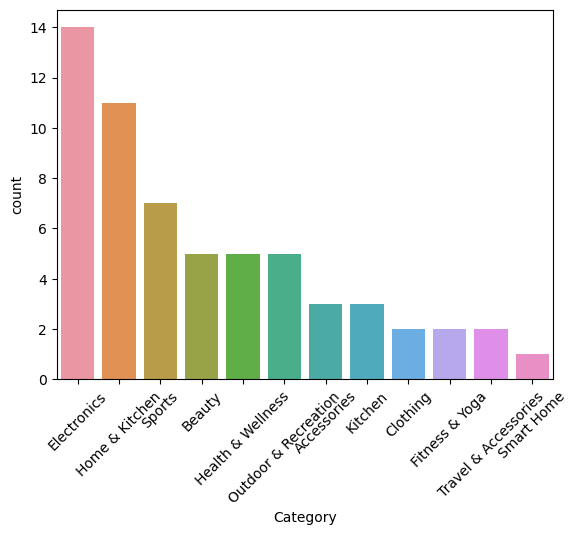

In [82]:
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

#### b.Piechart

Display the proportion of each category in a categorical variable.

<Axes: ylabel='count'>

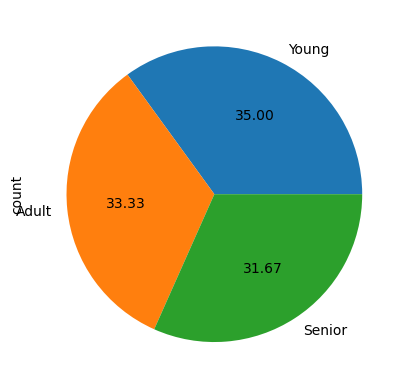

In [83]:
# using piechart to understand customer age
data['CustomerAge'].value_counts().plot(kind='pie', autopct='%.2f')

### 2.Numerical Data

#### a. Histogram

Histograms, a bar plot in which each bar represents the frequency (count) or proportion (count/total count) of cases for a range of values.

C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CustomerRating', ylabel='Count'>

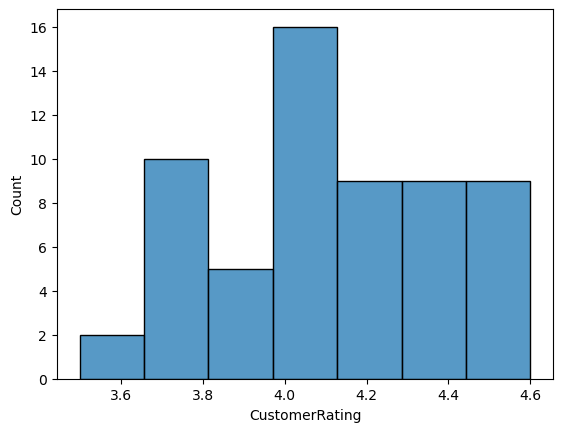

In [84]:
# histogram ploting is used to understand the 'CustomerRating'
sns.histplot(data=data, x='CustomerRating')

#### b. Distplot

Visualize distribution of a numerical column.

C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ShippingTime', ylabel='Density'>

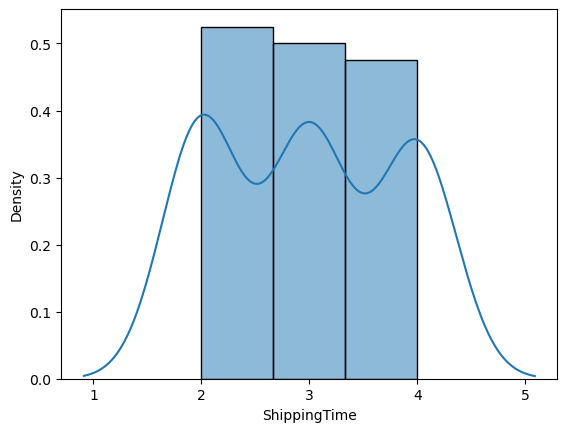

In [85]:
# using distplot to understand the 'ShippingTime'
sns.histplot(data=data, x='ShippingTime', kde='True', stat='density', kde_kws=dict(cut=3), bins=3)

#### c. Box Plot (Box and Whisker Plots)

Box plots, which graphically depict the five-number summary of minimum, first quartile, median, third quartile, and maximum.

<Axes: ylabel='CustomerRating'>

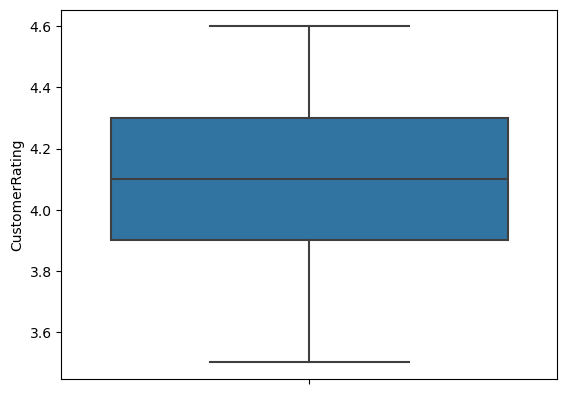

In [86]:
# using boxplot to understand the 'CustomerRating'
sns.boxplot(y=data['CustomerRating'])

*Note: Visualize the distribution and central tendency of numerical data across different categories. To identify variations, outliers, and the overall spread of numerical values within distinct categorical groups*

## Step3: Bi/Multi-variate Graphical Analysis
Bivariate graphical analysis involves examining the relationship between two variables through visual representation. Multivariate Analysis is an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them.

The main three types we will see here are: 

    - Numerical V/s Numerical
    - Categorical v/s Numerical
    - Categorical V/s Categorical data

In [87]:
tips_data = sns.load_dataset('tips')
tips_data.shape

(244, 7)

In [88]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [89]:
tips_data['time'].nunique()

2

### I Visualizing (Numerical -Numerical) Columns
#### 1. Scatterplot

Explore relationship between two numerical variables.

<Axes: xlabel='total_bill', ylabel='tip'>

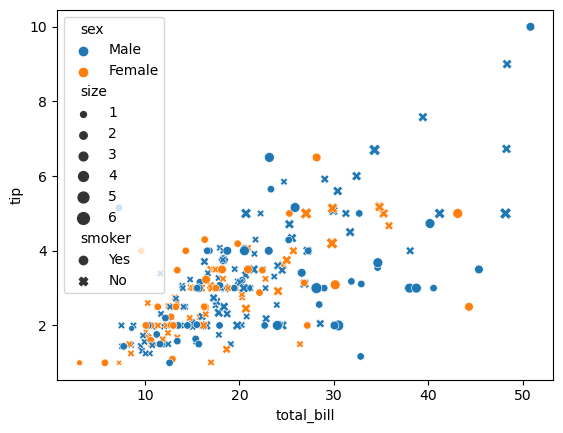

In [90]:
# using scatterplot to check the correlation between "total_bill, "tip", "sex, "smoker and "sex"
sns.scatterplot(data=tips_data, x='total_bill', y='tip', hue='sex', size='size', style='smoker')

#### 2. Lineplot

Display relation between two continuous variables.

C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_bill', ylabel='size'>

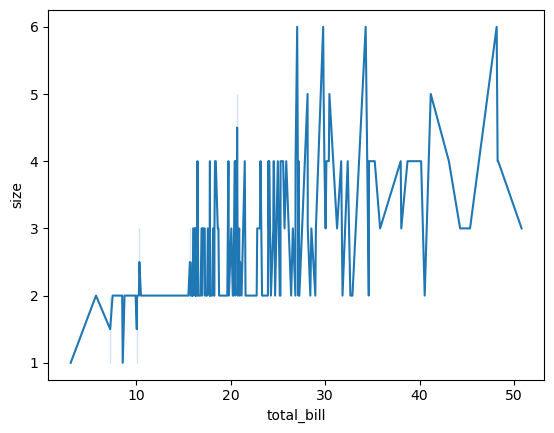

In [91]:
# using a linelpot to check the relation between 'total_bill' and 'size'
sns.lineplot(data=tips_data, x='total_bill', y='size')

### II Visualizing (Numerical -Categorical) Columns
#### 1. Bar Plot
Visualize the distribution of categorical variables.

C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='time', ylabel='size'>

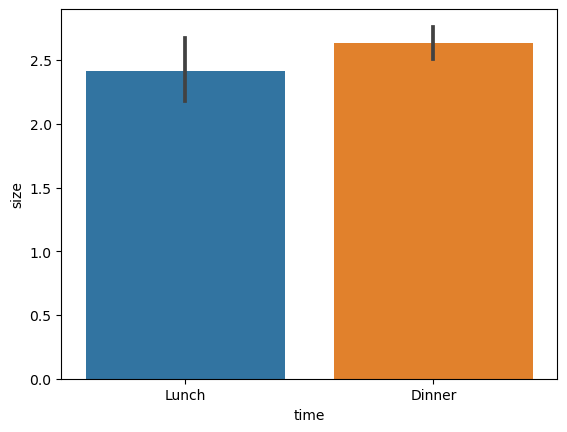

In [92]:
# using barplot to find the correclation between 'time' and 'size'
sns.barplot(data=tips_data, x='time', y='size')

#### 2. Box Plot Grouped by Category
Compare the distribution of the numerical varable across different categories.

C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='sex', ylabel='tip'>

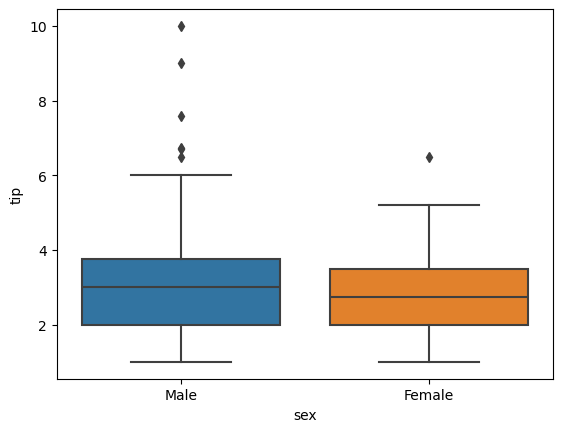

In [93]:
# using boxplot to check the correlation between 'sex' and 'tip'
sns.boxplot(data=tips_data, x='sex', y='tip')

#### 3. Distplot
Compare distributions of numerical variables across categories

C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


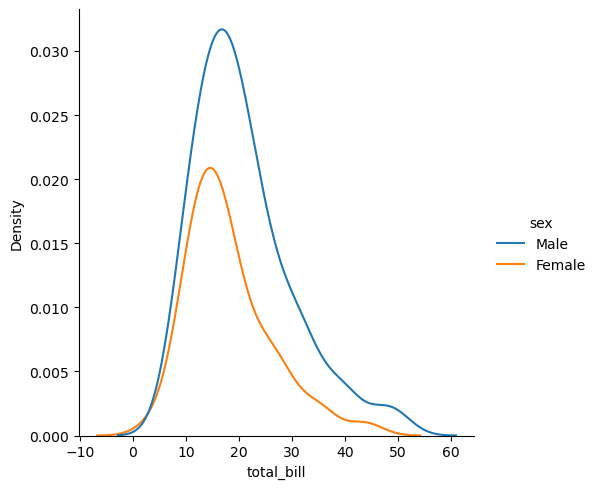

In [94]:
sns.displot(data=tips_data, x='total_bill', hue='sex', kind='kde')

### III Visualizing (Categorical - Categorical) Columns
#### 1. Heatmap
Diplay correlation coefficients between numerical variables.

In [95]:
# using crosstab pandas function to find the frequency table of features 'sex' and 'smoker'
pd.crosstab(tips_data['sex'], tips_data['smoker'])

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


<Axes: xlabel='smoker', ylabel='sex'>

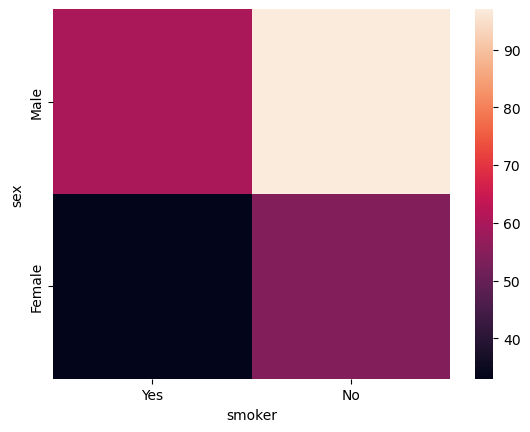

In [96]:
# using heatmap to visualize the frequency table and thus to find the correlation between 'sex' and 'smoker'
sns.heatmap(pd.crosstab(tips_data['sex'], tips_data['smoker']))

In [97]:
tips_data['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

### IV Visualizing all the Numerical Columns
#### 1. Pairplot
Visualizing pairwise relationships in a dataset

C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sebastian\anaconda3\envs\data_science_workspace\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


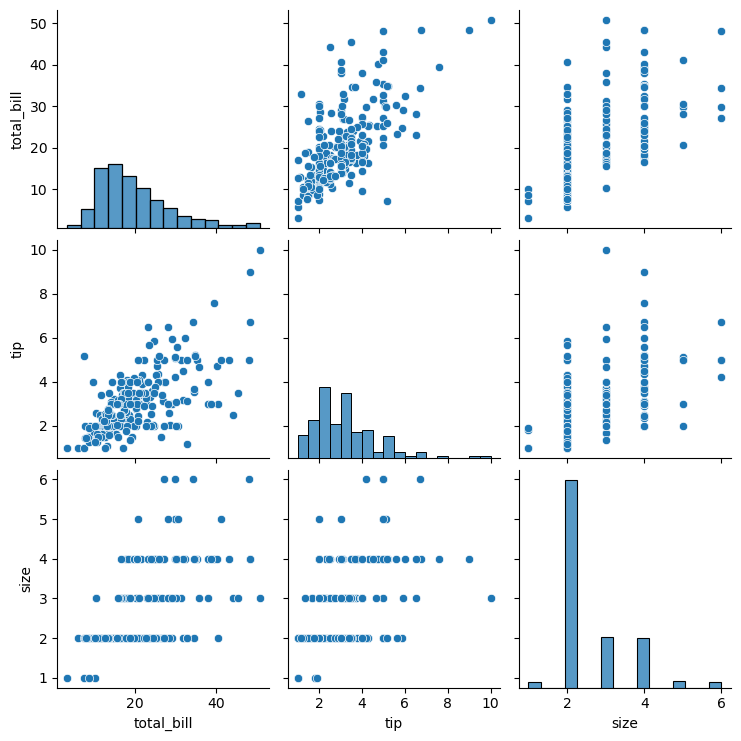

In [98]:
sns.pairplot(tips_data)

## Key Components of Exploratory Data Analysis

1. **Data Summarization:** Describing the main characteristics of the data, such as central tendency, variability, and distribution.

2. **Data Visualization:** Creating visual representations of the data to better understand its structure and identify patterns or trends.

3. **Data Cleaning:** Identifying and handling missing or inconsistent data to ensure the accuracy of the analysis.

4. **Statistical Analysis:** Using statistical methods to explore relationships between variables and test hypotheses.

5. **Pattern Recognition:** Identifying outliers, clusters, or any unusual patterns in the data.

6. **Hypothesis Generation:** Formulating initial hypotheses or questions about the data based on observed patterns.
